@Author : kkutysllb

@E-mail : libing1@sn.chinamobile.com，31468130@qq.com

@Date   : 2024-11-26 10:15

@Desc   : AleNet图片分类

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
import sys
import os
sys.path.append('../')
from kk_libraries.kk_functions import get_device, kk_animator_train_evaluate
from kk_libraries.kk_models import kk_init_weights_relu
from kk_libraries.kk_dataprocess import kk_load_data, kk_predict_images_labels
from kk_libraries.kk_constants import text_labels_cifar10, mean, std


In [2]:
# 定义模型
class AlexNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, 96, kernel_size=11, stride=4, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = nn.Sequential(
             nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc = nn.Sequential(
            nn.Linear(256*5*5, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size(0), 256*5*5)
        x = self.fc(x)
        return x


In [3]:
# 定义数据预处理
def kk_data_transform():
    return {
        'train': transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)]),
        'valid': transforms.Compose([transforms.Resize(224), 
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean, std)])
    }

In [4]:
# 数据加载
data_path = os.path.join('../', "data/CIFAR10")
train_loader, valid_loader, test_loader = kk_load_data(data_path, ratio=0.05, batch_size=256, DataSets=CIFAR10, transform=kk_data_transform())

Files already downloaded and verified
Files already downloaded and verified
训练集大小: 47500, 验证集大小: 2500, 测试集大小: 10000


In [5]:
# 定义超参数
epochs = 100
lr = 0.01
device = get_device()
# 定义模型
model = AlexNet(in_channels=3, num_classes=10).to(device)
model.apply(kk_init_weights_relu)
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.99)


KeyboardInterrupt: 

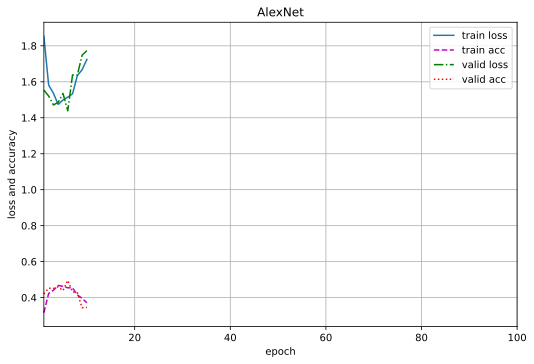

In [6]:
# 训练
kk_animator_train_evaluate(model, train_loader, valid_loader, criterion, optimizer, epochs, device, titles='AlexNet', model_name='AlexNet')


In [ ]:
# 测试
kk_predict_images_labels(model, test_loader, text_labels_cifar10, device,  resize=224, mean=mean, std=std)
